In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
path = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\CV\images\cat_damaged.png"

- The cv2.inpaint function in OpenCV is used for image inpainting, which is a technique to restore or reconstruct parts of an image. It is commonly used to remove unwanted objects, fill in missing regions, or repair damaged images.
- `new_img = cv2.inpaint(image, mask, 6, cv2.INPAINT_NS)`
- - image:
The input image in which you want to perform inpainting. It should be a single-channel or 3-channel image.

- - mask:
A single-channel binary mask where non-zero values (usually 255) indicate the regions to be inpainted. This tells the algorithm which areas of the image need to be restored.

- - 6:
This is the inpainting radius, a key parameter. It defines the radius around the pixels to consider for inpainting. Larger values mean that more surrounding pixels are taken into account during reconstruction.

- - cv2.INPAINT_NS:
This specifies the inpainting algorithm to use. In this case:

- - - cv2.INPAINT_NS (Navier-Stokes method): Fills in the missing area by propagating the pixel values along isophotes (lines of constant intensity). It works well for smoothly varying image regions.
Alternatively, you could use cv2.INPAINT_TELEA, which is a faster and more heuristic-driven method.

In [5]:
image = cv2.imread(path)

In [9]:
cv2.imshow('Cat', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
height, width, _ = image.shape
height, width, _

(400, 400, 3)

In [39]:
mask = np.zeros_like(image, dtype = 'uint8')

In [47]:
for i in range(400):
    for j in range(400):
        if all(image[i,j] == 0):
            mask[i,j] = [255,255,255]

In [51]:
cv2.imshow('mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [71]:
# image inpainting
new_img = cv2.inpaint(image, mask, 6, cv2.INPAINT_NS)
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

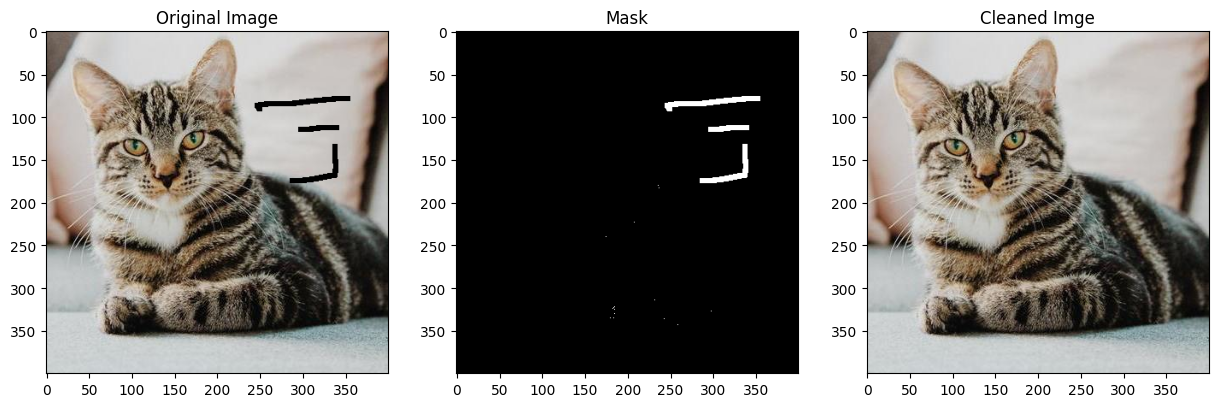

In [73]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title('Cleaned Imge')
plt.imshow(new_img)